<a href="https://colab.research.google.com/github/Farida-Yesmin/python/blob/main/handwritten_digit_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.image as mpimg
%matplotlib inline
#from keras.preprocessing.image import ImageDataGenerator

In [ ]:
np.random.seed(2)
sns.set(style='white', context='notebook', palette='deep')

In [81]:
# Load the data
train = pd.read_csv("/content/dataset/train.csv")
test = pd.read_csv("/content/dataset/test.csv")

In [ ]:
print(train.shape)
print(test.shape)

(1716, 785)
(2867, 784)


In [ ]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
Y_train = train['label']
# Drop 'label' column
X_train = train.drop(labels= ["label"], axis= 1)

# free some space
del train


In [ ]:
X_train.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.index

RangeIndex(start=0, stop=1716, step=1)

In [ ]:
X_train.values

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

In [ ]:
Y_train.values

array([1, 0, 1, ..., 6, 5, 3])

In [ ]:
Y_train.value_counts().sort_index()

label
0    172
1    179
2    212
3    143
4    174
5    158
6    175
7    170
8    158
9    175
Name: count, dtype: int64

In [ ]:
Y_train.value_counts().sort_values(ascending=False)

label
2    212
1    179
9    175
6    175
4    174
0    172
7    170
5    158
8    158
3    143
Name: count, dtype: int64

<ipython-input-17-96013684833d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette=colors)


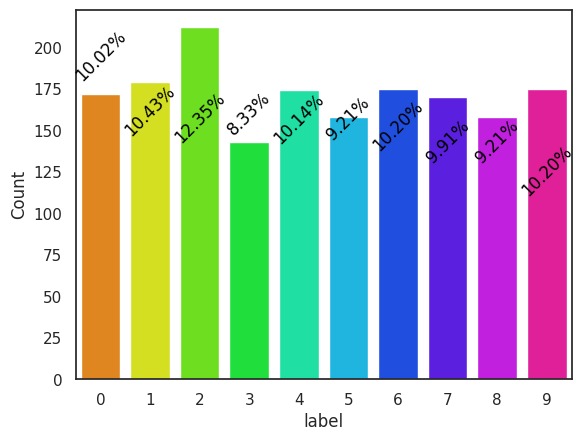

In [ ]:
# Assuming Y_train is a pandas Series
counts = Y_train.value_counts()
percentages = counts / len(Y_train) * 100

# Create custom color palette with a different color for each category
colors = sns.color_palette("hsv", len(counts))

# Create countplot
sns.countplot(x=Y_train, palette=colors)
plt.ylabel('Count')

# Add percentages as annotations to each bar
for i, count in enumerate(counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center', va='top', color='black', rotation=45)

plt.show()

In [ ]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        2
top       False
freq        438
dtype: object

In [ ]:
# Check the data
X_train.dtypes

pixel0        int64
pixel1        int64
pixel2        int64
pixel3        int64
pixel4        int64
             ...   
pixel779    float64
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
Length: 784, dtype: object

In [ ]:
test.isnull().any().describe()

count      784
unique       2
top       True
freq       436
dtype: object

I check for corrupted images (missing values inside).

There is no missing values in the train and test dataset. So we can safely go ahead.

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
#pip install --upgrade tensorflow

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).


# 2.6 Split training and valdiation set

In [ ]:
random_seed = 2

In [ ]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

Y_val = to_categorical(Y_val, num_classes = 10)

(-0.5, 27.5, 27.5, -0.5)

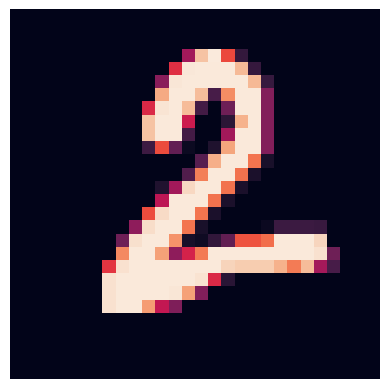

In [ ]:
# Some examples
g = plt.imshow(X_train[3][:,:,0])
#g = plt.imshow(X_train[100])
plt.axis(False)

# 3. CNN
### 3.1 Define the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [ ]:
print("Shape of Y_train_encoded:", Y_train.shape)
print("Shape of Y_val_encoded:", Y_val.shape)

Shape of Y_train_encoded: (1544, 10)
Shape of Y_val_encoded: (172, 10)


In [ ]:
# Set the CNN model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='Same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        36928     
                                                      

In [ ]:
import tensorflow as tf

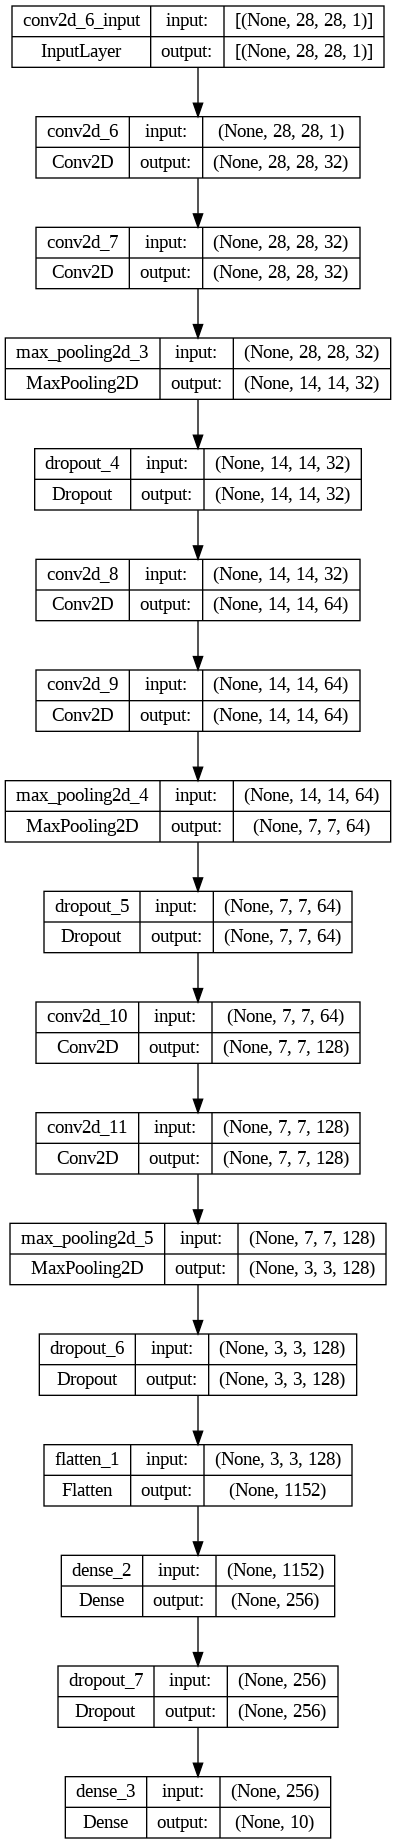

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## 3.2 Set the optimizer and annealer

In [ ]:
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

#optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, decay=0.0)


In [ ]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])



In [ ]:
#print("Logits shape:", logits.shape)
#print("Labels shape:", Y_train['labels'].shape)

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
# Set a learning rate annealer
# history 1
'''
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

'''

# history 2
learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy',
                                            #patience=5,
                                            verbose=2,
                                            factor=0.5,
                                            min_lr=0.00001)

In [ ]:
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 30

## 3.3 Data augmentation

The primary goal of data augmentation is to improve the generalization and robustness of machine learning models by exposing them to a wider range of variations in the input data. By generating new training examples that are similar but not identical to the original ones, data augmentation helps prevent overfitting and improves the model's ability to handle variations and noise in real-world data.

For example, in image classification tasks, data augmentation techniques can be used to generate additional training images by randomly rotating, flipping, or cropping the original images. Similarly, in natural language processing tasks, data augmentation can involve techniques such as adding synonyms, paraphrasing, or swapping words to create new training samples from existing ones.

In [ ]:
# Without data augmentation i obtained an accuracy of 0.98114
#history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
#          validation_data = (X_val, Y_val), verbose = 2)

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
       # With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Create the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',   # or 'val_accuracy' or another metric to monitor
    #patience=0,
    mode='max',# Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restores the model weights from the epoch with the best value of the monitored quantity
    #start_from_epoch=1,
)

In [ ]:
# Fit the model
# history 1
'''history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 10, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])'''

'history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),\n                              epochs = 10, validation_data = (X_val,Y_val),\n                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,\n                              callbacks=[learning_rate_reduction])'

In [ ]:
# Fit the model
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = 40, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction, early_stopping])

Epoch 1/40
51/51 - 12s - loss: nan - accuracy: 0.0997 - val_loss: nan - val_accuracy: 0.1105 - lr: 0.0010 - 12s/epoch - 242ms/step
Epoch 2/40
51/51 - 11s - loss: nan - accuracy: 0.0978 - val_loss: nan - val_accuracy: 0.1105 - lr: 0.0010 - 11s/epoch - 219ms/step


# 4. Evaluate the model

4. Evaluate the model
4.1 Training and validation curves

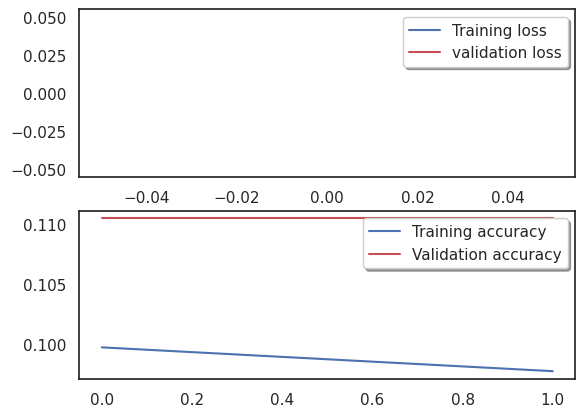

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# 4.2 Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

6/6 [==============================] - 1s 87ms/step
Normalized confusion matrix


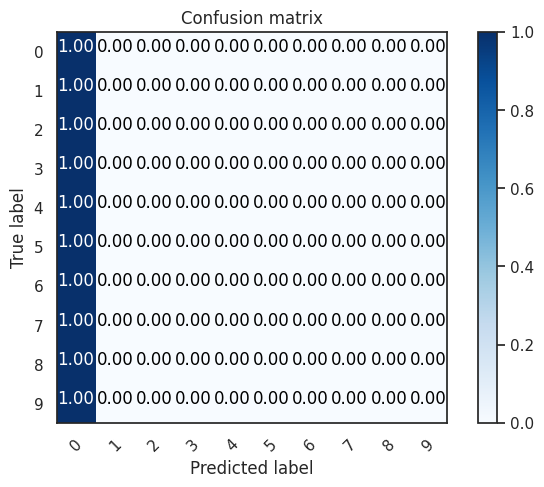

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(Y_val,axis = 1)
# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes=np.arange(10), normalize=True)
plt.show()


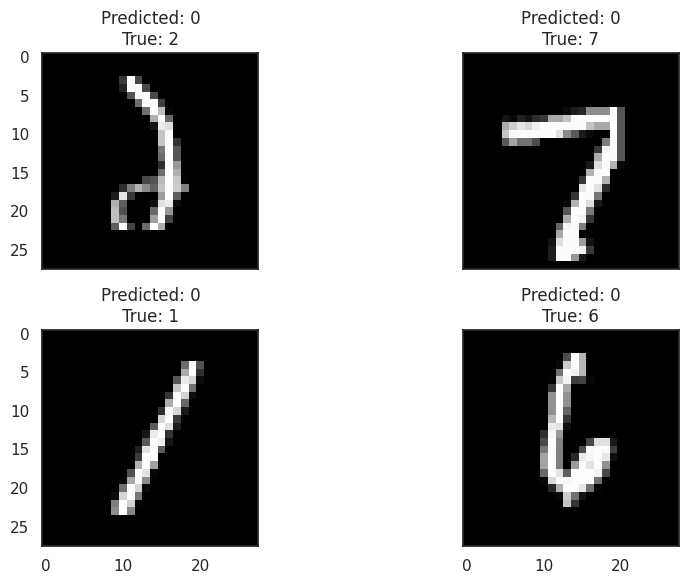

In [ ]:
# Find errors between predicted labels and true labels
errors = (Y_pred_classes != Y_true)

# Extract error predictions, true labels, and images
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

# Function to display error images and labels
def display_errors(errors_index, img_errors, pred_errors, true_errors):
    """ Display 6 images with their predicted and true labels """
    nrows = 2
    ncols = 2
    fig, ax = plt.subplots(nrows, ncols, figsize=(10, 6), sharex=True, sharey=True)
    for i, axi in enumerate(ax.flat):
        error_index = errors_index[i]
        axi.imshow(img_errors[error_index].reshape((28, 28)), cmap='gray')
        axi.set_title("Predicted: {}\nTrue: {}".format(pred_errors[error_index], true_errors[error_index]))
    plt.tight_layout()

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors, axis=1)

# Predicted probabilities of the true values in the error set
true_prob_errors = Y_pred_errors[np.arange(len(Y_true_errors)), Y_true_errors]

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_delta_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors
most_important_errors = sorted_delta_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
